In [1]:
import numpy as np
from  matplotlib import pyplot as plt

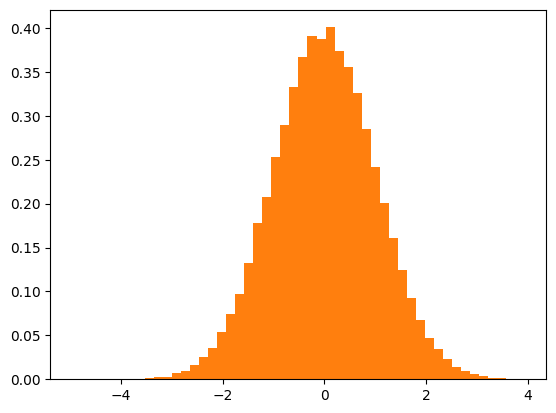

mu =  0 , Y_bar =  0.0013107764969701441 , E(Y) =  0.0 , diff =  0.0013107764969701441


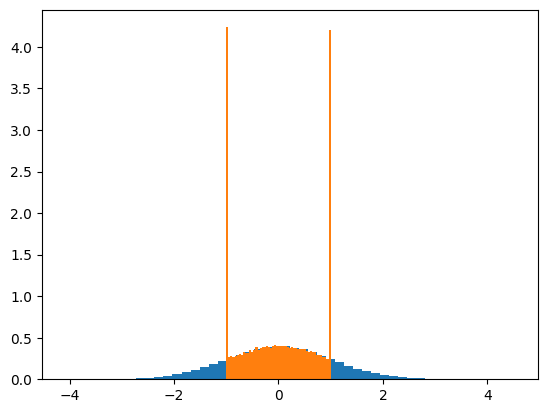

mu =  0 , Y_bar =  -0.00012638745974736748 , E(Y) =  0.0 , diff =  -0.00012638745974736748


In [37]:
N = 100000
sigma = 1
mu = 0
l = 100


x = np.random.normal(mu, sigma, N)
y = np.clip(x,-l, l)

plt.hist(x, bins= 50,  density = True  )
plt.hist(y, bins= 50, density= True)
plt.show()
mu_numerical = np.mean(y)
q = (np.cosh((l*np.pi)/(3**.5 * sigma)) + np.cosh((mu*np.pi)/(3**.5 * sigma)))

k0 = np.sinh((l*np.pi)/(3**.5 * sigma))/q
k1 = np.sinh((mu*np.pi)/(3**.5 * sigma))/q

mu_analytical = mu *k0 + l* k1
# print(k0, k1)
print('mu = ',mu ,', Y_bar = ', mu_numerical, ', E(Y) = ', mu_analytical, ', diff = ', mu_numerical- mu_analytical)

sigma = 1
mu = 0
l = 1


x = np.random.normal(mu, sigma, N)
y = np.clip(x,-l, l)

plt.hist(x, bins= 50,  density = True  )
plt.hist(y, bins= 50, density= True)
plt.show()
mu_numerical = np.mean(y)
q = (np.cosh((l*np.pi)/(3**.5 * sigma)) + np.cosh((mu*np.pi)/(3**.5 * sigma)))

k0 = np.sinh((l*np.pi)/(3**.5 * sigma))/q
k1 = np.sinh((mu*np.pi)/(3**.5 * sigma))/q

mu_analytical = mu *k0 + l* k1
# print(k0, k1)
print('mu = ',mu ,', Y_bar = ', mu_numerical, ', E(Y) = ', mu_analytical, ', diff = ', mu_numerical- mu_analytical)

In [133]:
mu_numerical = np.mean(y)
q = (np.cosh((l*np.pi)/(3**.5 * sigma)) + np.cosh((mu*np.pi)/(3**.5 * sigma)))

k0 = np.sinh((l*np.pi)/(3**.5 * sigma))/q
k1 = np.sinh((mu*np.pi)/(3**.5 * sigma))/q

mu_analytical = mu *k0 + l* k1
print(k0, k1)
print('mu = ',mu ,', Y_bar = ', mu_numerical, ', E(Y) = ', mu_analytical, ', diff = ', mu_numerical- mu_analytical)


def simulate(mu, sigma, l, N = 10000):
    x_mean = []
    mu_analytical = []
    mu_numerical = []

    x_sigma = []
    sigma_analytical = []
    sigma_empirical = []
    for _ in range(100):
        x = np.random.normal(mu, sigma, N)
        x_mean.append( np.mean(x))
        y = np.clip(x,-l, l)

        mu_numerical.append( np.mean(y))

        sigma_empirical.append(np.std(y))

        q = (np.cosh((l*np.pi)/(3**.5 * sigma)) + np.cosh((mu*np.pi)/(3**.5 * sigma)))

        k0 = np.sinh((l*np.pi)/(3**.5 * sigma))/q
        k1 = np.sinh((mu*np.pi)/(3**.5 * sigma))/q
        m = mu *k0 + l* k1
        mu_analytical.append(m)
        sigma_analytical.append((l**2 *(1-k0) + (sigma**2 +mu**2)*k0 - m**2)**.5)
    return np.array(x_mean), np.array(mu_numerical), np.array(mu_analytical), np.array(x_sigma), np.array(sigma_empirical), np.array(sigma_analytical)


# mu_simulate = lambda l: simulate(mu =mu, sigma = sigma, l= l)





tensor(0.9220) tensor(0.0135)
mu =  0.1 , Y_bar =  -0.00012638745974736748 , E(Y) =  tensor(0.1161) , diff =  tensor(-0.1162)


mu =  0.0 	 sigma =  1


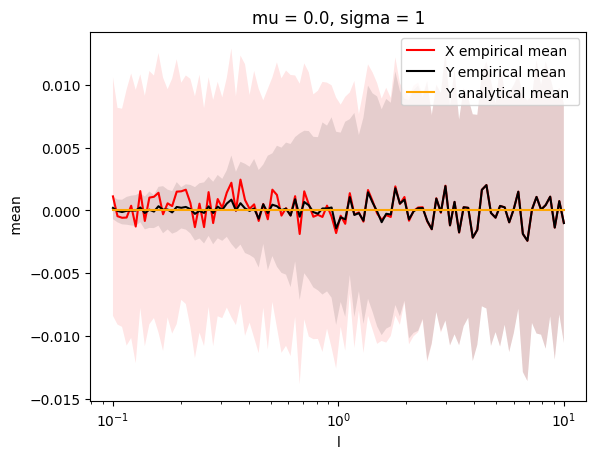

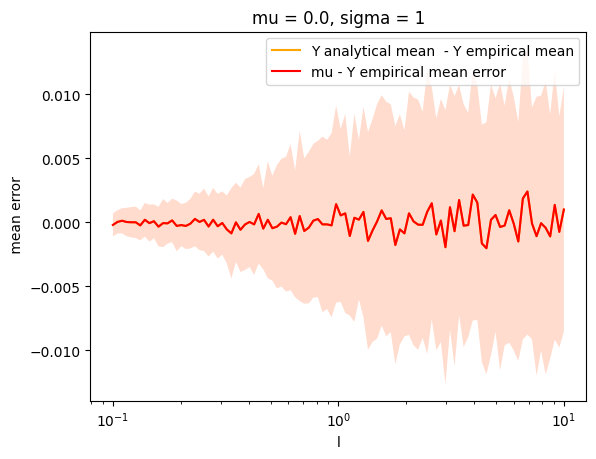

mu =  0.3 	 sigma =  1


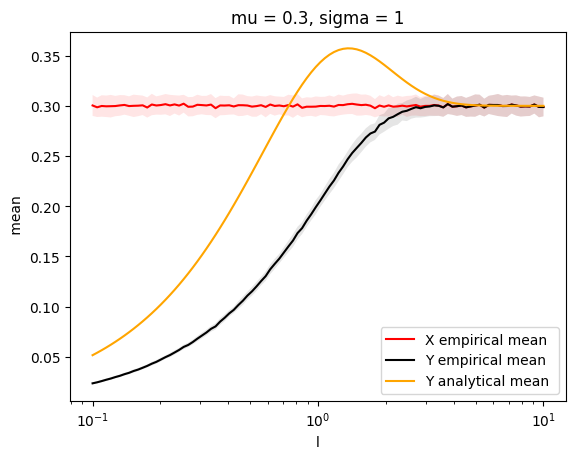

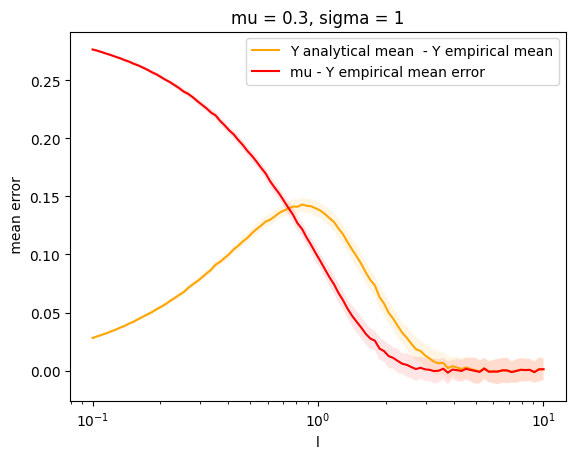

mu =  0.6 	 sigma =  1


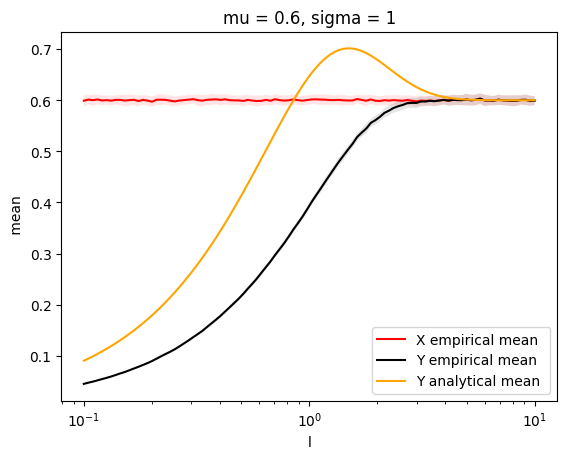

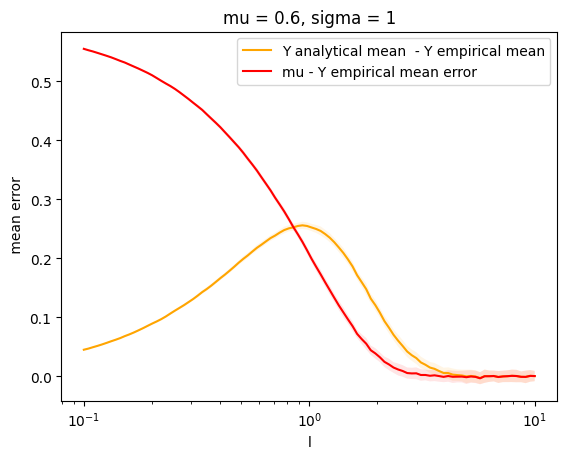

mu =  0.9 	 sigma =  1


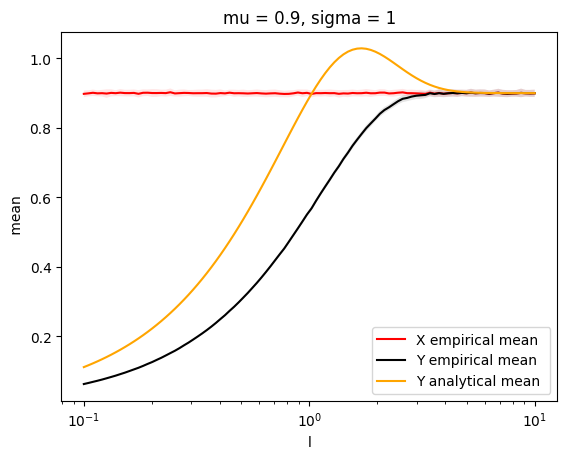

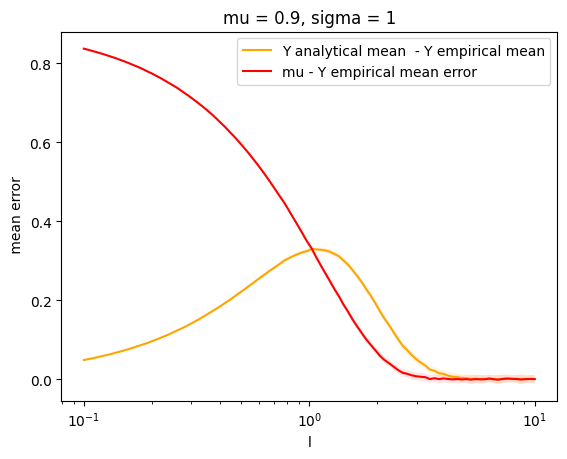

mu =  0.3 	 sigma =  0.25


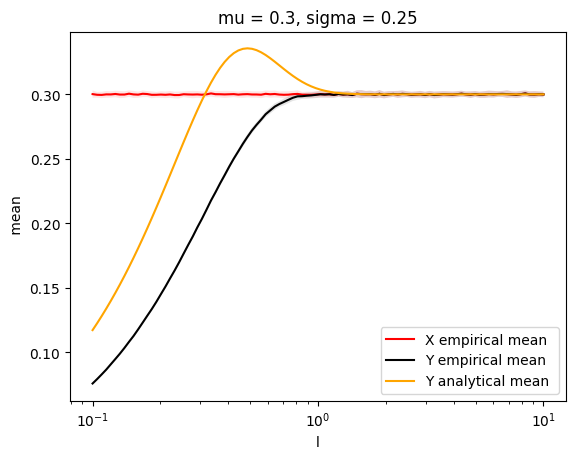

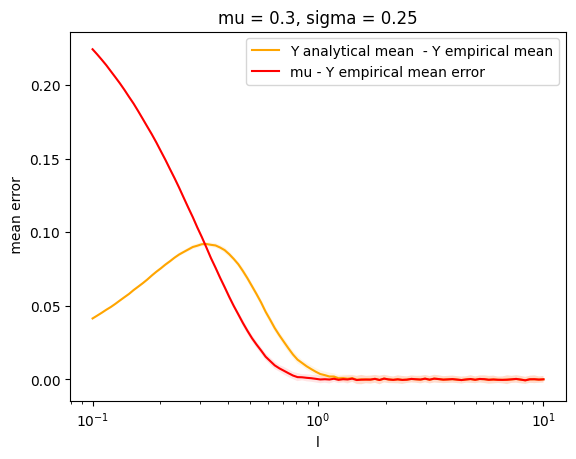

mu =  0.3 	 sigma =  1.5


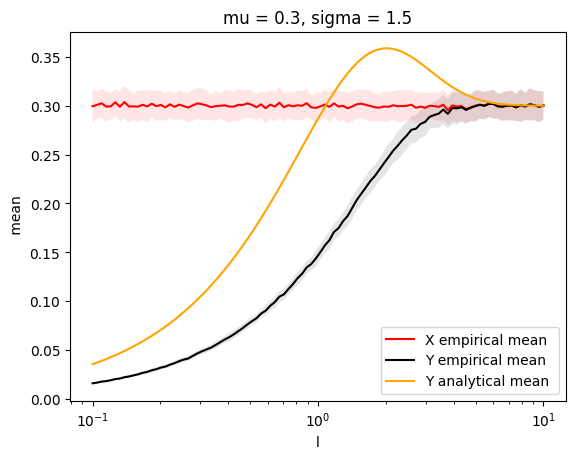

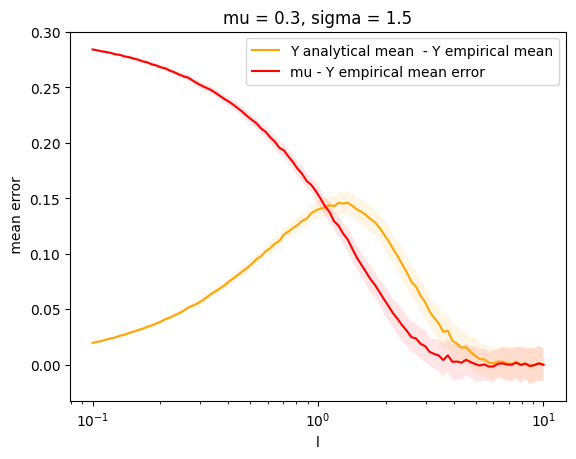

mu =  0.3 	 sigma =  2.75


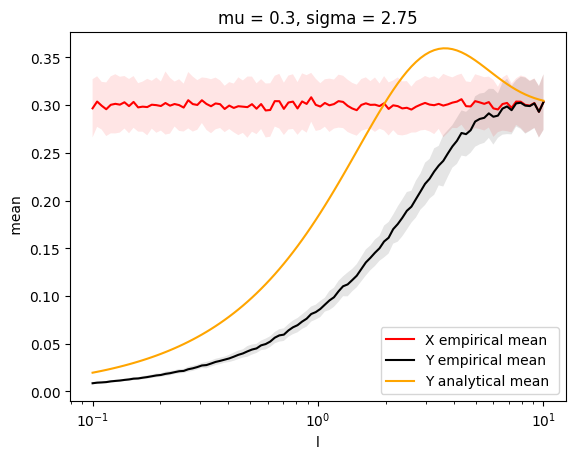

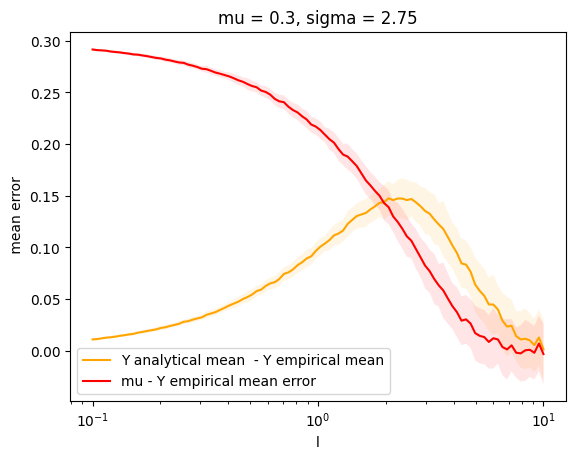

mu =  0.3 	 sigma =  4.0


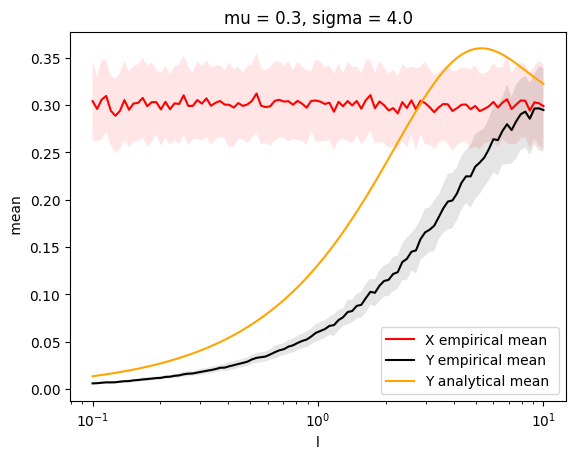

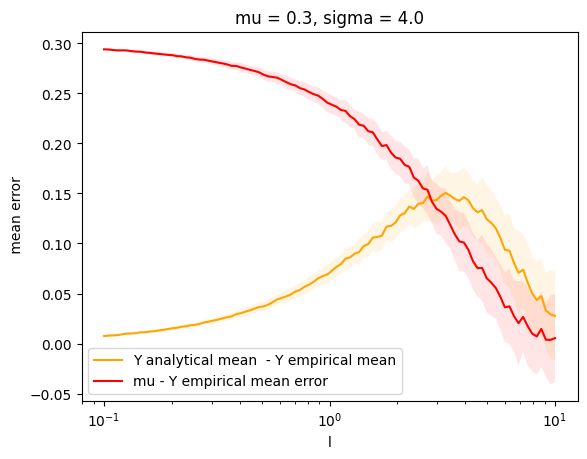

In [147]:
def plot_error_l(mu, sigma, l_pts):
    x_mean = []
    x_std = []

    y_mean =[]
    y_std = []
    y_err_mean = []
    y_err_std =[]
    y_hat_mean = []
    y_hat_std = []

    for l in l_pts:


        res = simulate(mu= mu, sigma = sigma, l= l)
        x_mean.append(np.mean(res[0]))
        x_std.append(np.std(res[0]))

        y_mean.append(np.mean(res[1]))
        y_std.append(np.std(res[1]))

        y_hat_mean.append(np.mean(res[2]))
        y_hat_std.append(np.std(res[2]))
        y_err_mean.append(np.mean(res[2]-res[1]))
        y_err_std.append(np.std(res[2]-res[1]))

    x_mean = np.array(x_mean)
    x_std = np.array(x_std)

    y_mean = np.array(y_mean)
    y_std = np.array(y_std)

    y_hat_mean = np.array(y_hat_mean)
    y_hat_std = np.array(y_hat_std)

    y_err_mean = np.array(y_err_mean)
    y_err_std = np.array(y_err_std)

    plt.plot(l_pts, x_mean, 'red', label = 'X empirical mean')
    plt.fill_between(l_pts, x_mean -x_std, x_mean + x_std,  alpha = 0.1 , facecolor='red', label = None)
    plt.plot(l_pts, y_mean, 'black', label = 'Y empirical mean ')

    plt.fill_between(l_pts, y_mean -y_std, y_mean + y_std,alpha = 0.1 , facecolor='black', label = None)

    plt.plot(l_pts, y_hat_mean, 'orange', label ='Y analytical mean ')
    plt.fill_between(l_pts, y_hat_mean -y_hat_std, y_hat_mean + y_hat_std,alpha = 0.1 , facecolor='orange', label = None)

    plt.xscale('log')

    plt.title('mu = '+ str(mu)+ ', sigma = ' + str(sigma))
    plt.xlabel('l')
    plt.ylabel(' mean')
    plt.legend()
    plt.show()

    plt.plot(l_pts, y_err_mean, 'orange', label ='Y analytical mean  - Y empirical mean')
    plt.fill_between(l_pts, y_err_mean -y_err_std, y_err_mean + y_err_std,alpha = 0.1 , facecolor='orange', label = None)

    plt.plot(l_pts, mu-y_mean, 'red', label ='mu - Y empirical mean error')
    plt.fill_between(l_pts, mu-y_mean -y_std, mu -y_mean + y_std,alpha = 0.1 , facecolor='red', label = None)

    plt.title('mu = '+ str(mu)+ ', sigma = ' + str(sigma))
    plt.xlabel('l')
    plt.ylabel(' mean error')
    plt.legend()
    plt.xscale('log')

    plt.show()

l_pts = np.logspace(-1, 1, 100)

sigma = 1
for mu in range(0,11, 3):
    print ('mu = '  ,mu/10,'\t sigma = ', sigma )

    plot_error_l(mu/10, sigma, l_pts)

mu = .3
for sigma in range(1,20, 5):
    print ('mu = '  ,mu,'\t sigma = ', sigma/4 )

    plot_error_l(mu, sigma/4, l_pts)




In [100]:
import torch
from torch.distributions import Beta
from torch.distributions.kl import kl_divergence

learning_rate = 0.00001

a0 = torch.tensor([2., 3.], requires_grad=True)
b0 = torch.tensor([6., 12.], requires_grad=True)
A = torch.tensor([.1, 5], requires_grad=False)
B = torch.tensor([.1, 4], requires_grad=False)
# p = Beta(a0, b0)
# q = Beta(A, B)
#
# loss = kl_divergence(p,q)
# loss.sum().backward()
# print(loss.sum())
# print(a0.data, a0.grad, b0.data, b0.grad)
# a0.data -= learning_rate * a0.grad.data
# b0.data -= learning_rate * b0.grad.data
#
l =0
for i in range(10000):
    p = Beta(a0, b0)
    q = Beta(A, B)

    loss = kl_divergence(p,q)
    loss.sum().backward()
    # print()
    if i%1 ==0:
        print('iteration: ',i, '\nloss: ', loss.sum().data, l - loss.sum().data,  '\na: ', a0.data, a0.grad, '\nb: ',b0.data, b0.grad, '\n\n')
    a0.data -= learning_rate * a0.grad.data
    b0.data -= learning_rate * b0.grad.data
    l = loss.sum().data

iteration:  0 
loss:  tensor(4.8770) tensor(-4.8770) 
a:  tensor([2., 3.]) tensor([ 0.1869, -1.2035]) 
b:  tensor([ 6., 12.]) tensor([0.0313, 0.2816]) 


iteration:  100 
loss:  tensor(4.7997) tensor(0.0015) 
a:  tensor([1.9906, 3.0604]) tensor([  18.9152, -120.1890]) 
b:  tensor([ 5.9984, 11.9858]) tensor([ 3.1638, 28.3637]) 


iteration:  200 
loss:  tensor(4.5869) tensor(0.0027) 
a:  tensor([1.9623, 3.2367]) tensor([  37.8689, -231.6831]) 
b:  tensor([ 5.9937, 11.9437]) tensor([ 6.2892, 56.0050]) 


iteration:  300 
loss:  tensor(4.2815) tensor(0.0034) 
a:  tensor([1.9149, 3.5185]) tensor([  57.2882, -330.4852]) 
b:  tensor([ 5.9859, 11.8743]) tensor([ 9.4002, 82.8091]) 


iteration:  400 
loss:  tensor(3.9308) tensor(0.0036) 
a:  tensor([1.8477, 3.8918]) tensor([  77.4515, -414.3677]) 
b:  tensor([ 5.9749, 11.7787]) tensor([ 12.4890, 108.4458]) 


iteration:  500 
loss:  tensor(3.5722) tensor(0.0035) 
a:  tensor([1.7598, 4.3415]) tensor([  98.7036, -483.4648]) 
b:  tensor([ 5.9609,

In [2]:
import torch
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence

learning_rate = 0.00001

a0 = torch.tensor([[2.,], [3.,]], requires_grad=True)
b0 = torch.tensor([[6.,], [12.,]], requires_grad=True)
A = torch.tensor([[2,], [5,]], requires_grad=False)
B = torch.tensor([[6,], [4,]], requires_grad=False)
# p = Beta(a0, b0)
# q = Beta(A, B)
#
# loss = kl_divergence(p,q)
# loss.sum().backward()
# print(loss.sum())
# print(a0.data, a0.grad, b0.data, b0.grad)
# a0.data -= learning_rate * a0.grad.data
# b0.data -= learning_rate * b0.grad.data
#
l =0
for i in range(50):
    p = Normal(a0, b0)
    q = Normal(A, B)

    loss = kl_divergence(p,q)
    loss.sum().backward()
    # print()
    if i%1 ==0:
        print('iteration: ',i, '\nloss: ', loss.sum().data, l - loss.sum().data,  '\na: ', a0.data, '\n',a0.grad, '\nb: ',b0.data, '\n',b0.grad, '\n\n')
    a0.data -= learning_rate * a0.grad.data
    b0.data -= learning_rate * b0.grad.data
    l = loss.sum().data

iteration:  0 
loss:  tensor(3.0264) tensor(-3.0264) 
a:  tensor([[2.],
        [3.]]) 
 tensor([[ 0.0000],
        [-0.1250]]) 
b:  tensor([[ 6.],
        [12.]]) 
 tensor([[0.0000],
        [0.6667]]) 


iteration:  1 
loss:  tensor(3.0264) tensor(4.2915e-06) 
a:  tensor([[2.0000],
        [3.0000]]) 
 tensor([[ 0.0000],
        [-0.2500]]) 
b:  tensor([[ 6.0000],
        [12.0000]]) 
 tensor([[0.0000],
        [1.3333]]) 


iteration:  2 
loss:  tensor(3.0264) tensor(9.2983e-06) 
a:  tensor([[2.0000],
        [3.0000]]) 
 tensor([[ 0.0000],
        [-0.3750]]) 
b:  tensor([[ 6.0000],
        [12.0000]]) 
 tensor([[0.0000],
        [2.0000]]) 


iteration:  3 
loss:  tensor(3.0264) tensor(1.4067e-05) 
a:  tensor([[2.0000],
        [3.0000]]) 
 tensor([[ 0.0000],
        [-0.5000]]) 
b:  tensor([[ 6.0000],
        [12.0000]]) 
 tensor([[0.0000],
        [2.6667]]) 


iteration:  4 
loss:  tensor(3.0263) tensor(1.8120e-05) 
a:  tensor([[2.0000],
        [3.0000]]) 
 tensor([[ 0.0000],


In [7]:
import torch
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence

learning_rate = 0.01

a0 = torch.tensor([[2.,], [3.,]], requires_grad=True)
b0 = torch.tensor([[6.,], [12.,]], requires_grad=True)
A = torch.tensor([[2,], [5,]], requires_grad=False)
B = torch.tensor([[6,], [4,]], requires_grad=False)
# p = Beta(a0, b0)
# q = Beta(A, B)
#
# loss = kl_divergence(p,q)
# loss.sum().backward()
# print(loss.sum())
# print(a0.data, a0.grad, b0.data, b0.grad)
# a0.data -= learning_rate * a0.grad.data
# b0.data -= learning_rate * b0.grad.data
#
l =0
for i in range(10000):
    p = Normal(a0, b0)
    q = Normal(A, B)

    loss = kl_divergence(p,q)
    loss.sum().backward()
    # print()
    if i%100 ==0:
        print('iteration: ',i, '\nloss: ', loss.sum().data, l - loss.sum().data,  '\na: ', a0.data, '\n',a0.grad, '\nb: ',b0.data, '\n',b0.grad, '\n\n')
    a0.data -= learning_rate * a0.grad.data
    b0.data -= learning_rate * b0.grad.data
    l = loss.sum().data
    a0.grad.data.zero_()
    b0.grad.data.zero_()

iteration:  0 
loss:  tensor(3.0264) tensor(-3.0264) 
a:  tensor([[2.],
        [3.]]) 
 tensor([[ 0.0000],
        [-0.1250]]) 
b:  tensor([[ 6.],
        [12.]]) 
 tensor([[0.0000],
        [0.6667]]) 


iteration:  100 
loss:  tensor(2.5967) tensor(0.0040) 
a:  tensor([[2.0000],
        [3.1212]]) 
 tensor([[ 0.0000],
        [-0.1174]]) 
b:  tensor([[ 6.0000],
        [11.3558]]) 
 tensor([[0.0000],
        [0.6217]]) 


iteration:  200 
loss:  tensor(2.2232) tensor(0.0035) 
a:  tensor([[2.0000],
        [3.2351]]) 
 tensor([[ 0.0000],
        [-0.1103]]) 
b:  tensor([[ 6.0000],
        [10.7554]]) 
 tensor([[0.0000],
        [0.5792]]) 


iteration:  300 
loss:  tensor(1.8990) tensor(0.0030) 
a:  tensor([[2.0000],
        [3.3420]]) 
 tensor([[ 0.0000],
        [-0.1036]]) 
b:  tensor([[ 6.0000],
        [10.1961]]) 
 tensor([[0.0000],
        [0.5392]]) 


iteration:  400 
loss:  tensor(1.6182) tensor(0.0026) 
a:  tensor([[2.0000],
        [3.4425]]) 
 tensor([[ 0.0000],
        

In [11]:
import torch
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence
import torch.optim as optim

learning_rate = 0.01

a0 = torch.tensor([[2.,], [3.,]], requires_grad=True)
b0 = torch.tensor([[6.,], [12.,]], requires_grad=True)
A = torch.tensor([[2,], [5,]], requires_grad=False)
B = torch.tensor([[6,], [4,]], requires_grad=False)
# p = Beta(a0, b0)
# q = Beta(A, B)
#
# loss = kl_divergence(p,q)
# loss.sum().backward()
# print(loss.sum())
# print(a0.data, a0.grad, b0.data, b0.grad)
# a0.data -= learning_rate * a0.grad.data
# b0.data -= learning_rate * b0.grad.data
#
optimizer = optim.Adam([a0, b0])
l =0
for i in range(10000):
    p = Normal(a0, b0)
    q = Normal(A, B)
    # optimizer.zero_grad()
    loss = kl_divergence(p,q)
    loss.sum().backward()
    # print()
    if i%100 ==0:
        print('iteration: ',i, '\nloss: ', loss.sum().data, l - loss.sum().data,  '\na: ', a0.data, '\n',a0.grad, '\nb: ',b0.data, '\n',b0.grad, '\n\n')
    optimizer.step()
    l = loss.sum().data


iteration:  0 
loss:  tensor(3.0264) tensor(-3.0264) 
a:  tensor([[2.],
        [3.]]) 
 tensor([[ 0.0000],
        [-0.1250]]) 
b:  tensor([[ 6.],
        [12.]]) 
 tensor([[0.0000],
        [0.6667]]) 


iteration:  100 
loss:  tensor(2.9215) tensor(0.0012) 
a:  tensor([[2.0000],
        [3.1338]]) 
 tensor([[  0.0000],
        [-12.2338]]) 
b:  tensor([[ 6.0000],
        [11.8660]]) 
 tensor([[ 0.0000],
        [66.8980]]) 


iteration:  200 
loss:  tensor(2.8008) tensor(0.0012) 
a:  tensor([[2.0000],
        [3.2907]]) 
 tensor([[  0.0000],
        [-23.4047]]) 
b:  tensor([[ 6.0000],
        [11.7077]]) 
 tensor([[  0.0000],
        [132.0794]]) 


iteration:  300 
loss:  tensor(2.6817) tensor(0.0012) 
a:  tensor([[2.0000],
        [3.4487]]) 
 tensor([[  0.0000],
        [-33.5887]]) 
b:  tensor([[ 6.0000],
        [11.5470]]) 
 tensor([[  0.0000],
        [196.1445]]) 


iteration:  400 
loss:  tensor(2.5664) tensor(0.0011) 
a:  tensor([[2.0000],
        [3.6049]]) 
 tensor([[  